In [234]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [235]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import numpy as np

In [236]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


def get_test_image(path):
  image = load_img(path, target_size=(299, 299))
  display(image)
  image = img_to_array(image)
  image = image.reshape(1, 299, 299, 3)
  image = image.astype('float32')
  image = image / 255.0
  # print(image)
  # print(image.shape)
  return image

In [237]:
base_dir = '/content/drive/MyDrive/ktintern/'

inceptionV3_model = tf.keras.models.load_model(os.path.join(base_dir, 'checkpoints/inceptionV3_model.h5'))
inceptionV3_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

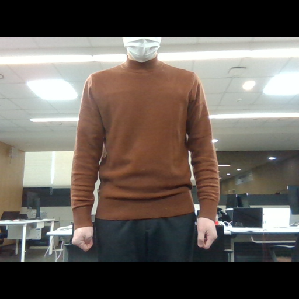

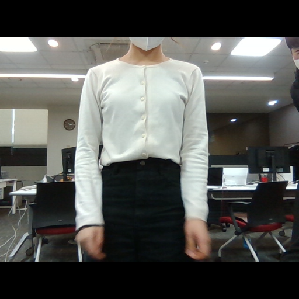

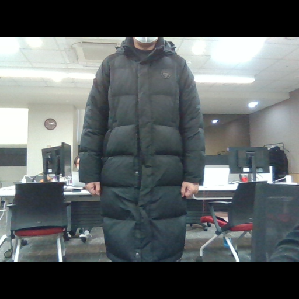

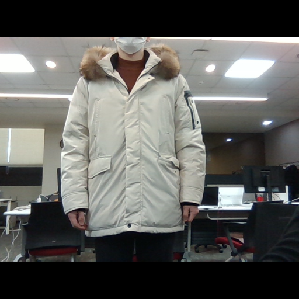

In [130]:
test_dir = '/content/drive/MyDrive/ktintern/test'

test2_1 = get_test_image(os.path.join(test_dir, 'out2_1.png'))
test2_2 = get_test_image(os.path.join(test_dir, 'out2_2.png'))
test2_3 = get_test_image(os.path.join(test_dir, 'out2_3.png'))
test2_4 = get_test_image(os.path.join(test_dir, 'out2_4.png'))

In [238]:
def get_prediction(test_image):
  prediction = inceptionV3_model.predict(test_image)
  print(prediction)
  print(np.argmax(prediction))

In [239]:
get_prediction(test2_1)
get_prediction(test2_2)
get_prediction(test2_3)
get_prediction(test2_4)

[[-2.8730505  -0.44843557  1.6336029  -4.1796684   2.6502502  -0.3258476
   0.13845192 -0.13611552  0.156076   -0.78177524 -3.5602036 ]]
4
[[-0.7274873   2.112918   -1.3127394   1.5286611  -1.0295056   0.29659685
  -3.237478   -0.4494767   0.32089186 -2.72721    -2.8970158 ]]
1
[[-2.0498853   4.1166472  -3.3028038  -0.85034907 -3.8339267   1.6738266
  -1.1753411   0.2136994  -1.0608721  -2.9374666  -0.88105553]]
1
[[-2.4681368  1.1572334 -2.769266  -4.7433324 -1.4966234  5.0702176
   6.37153   -4.2580123 -3.0717394 -2.1031218 -4.545832 ]]
6


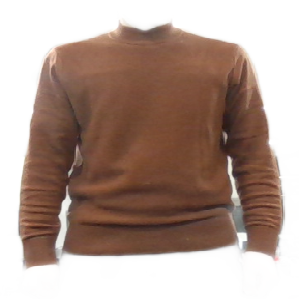

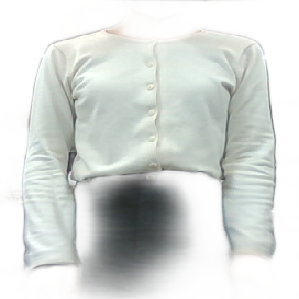

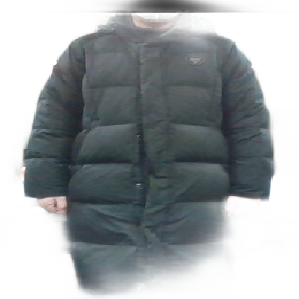

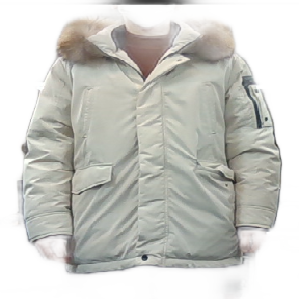

In [138]:
test2_1_2 = get_test_image(os.path.join(test_dir, 'out2_1_2.PNG'))
test2_2_2 = get_test_image(os.path.join(test_dir, 'out2_2_2.PNG'))
test2_3_2 = get_test_image(os.path.join(test_dir, 'out2_3_2.PNG'))
test2_4_2 = get_test_image(os.path.join(test_dir, 'out2_4_2.PNG'))

In [140]:
get_prediction(test2_1_2)
get_prediction(test2_2_2)
get_prediction(test2_3_2)
get_prediction(test2_4_2)

4
3
5
5


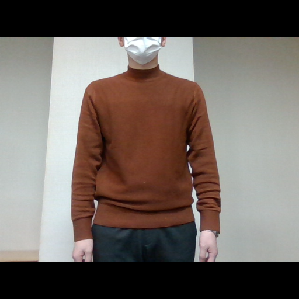

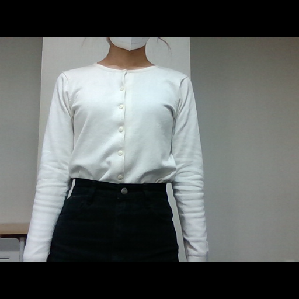

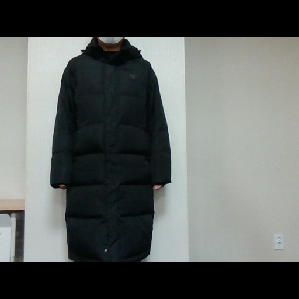

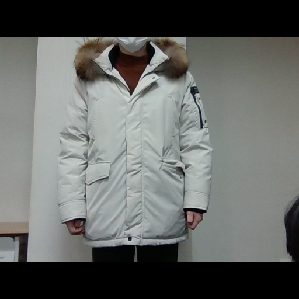

In [143]:
test3_1 = get_test_image(os.path.join(test_dir, 'out3_1.png'))
test3_2 = get_test_image(os.path.join(test_dir, 'out3_2.png'))
test3_3 = get_test_image(os.path.join(test_dir, 'out3_3.png'))

test3_4 = get_test_image(os.path.join(test_dir, 'out3_4.png'))

In [146]:
get_prediction(test3_1)
get_prediction(test3_2)
get_prediction(test3_3)
get_prediction(test3_4)

5
1
1
1


In [225]:
from PIL import Image

def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    result = np.asarray( rgb, dtype='uint8' )
    print("뭐야0", result.shape)
    return result


def get_test_image2(path):
  image = load_img(path, color_mode='rgba')
  # image = load_img(path, target_size=(299, 299), color_mode='rgba')
  display(image)

  image = img_to_array(image)
  image = rgba2rgb(image)
  image = image[80:-80, 80:-80]

  plt.imshow(image, interpolation='nearest')
  plt.show()

  print("wow1",image.shape)
  image = np.expand_dims(image, axis=0)
  print("wow2",image.shape)
  image = image.astype('float32')
  image = image / 255.0
  # print(image)
  print(image.shape)
  return image


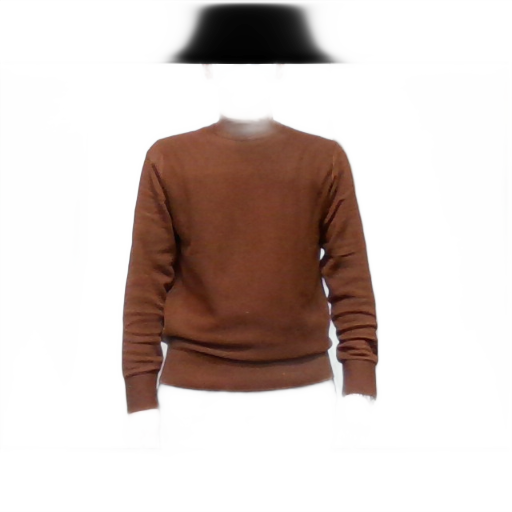

뭐야0 (512, 512, 3)


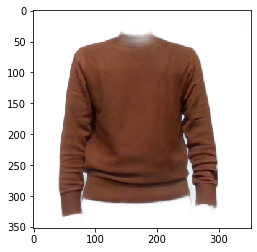

wow1 (352, 352, 3)
wow2 (1, 352, 352, 3)
(1, 352, 352, 3)


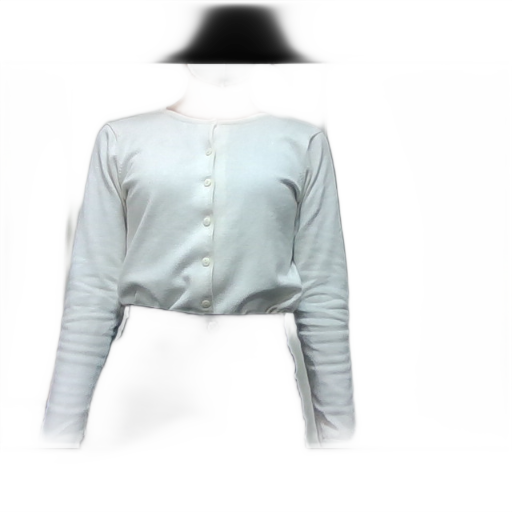

뭐야0 (512, 512, 3)


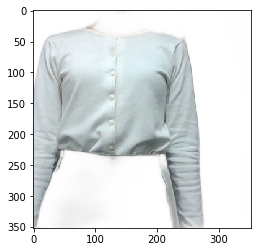

wow1 (352, 352, 3)
wow2 (1, 352, 352, 3)
(1, 352, 352, 3)


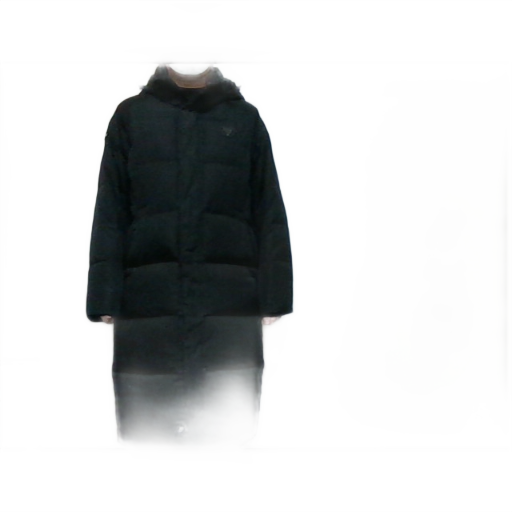

뭐야0 (512, 512, 3)


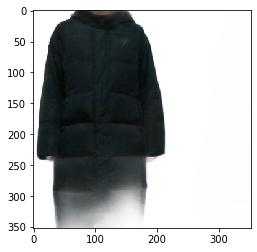

wow1 (352, 352, 3)
wow2 (1, 352, 352, 3)
(1, 352, 352, 3)


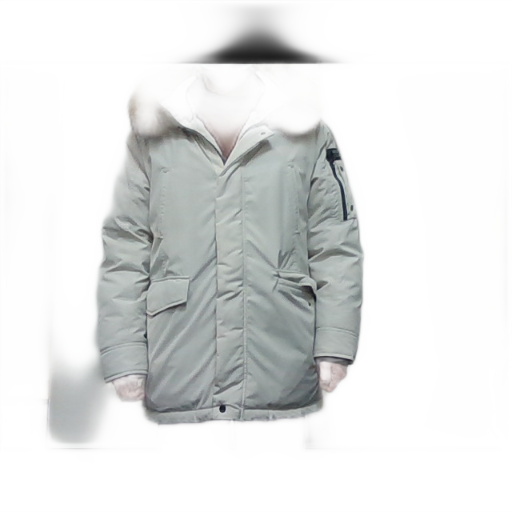

뭐야0 (512, 512, 3)


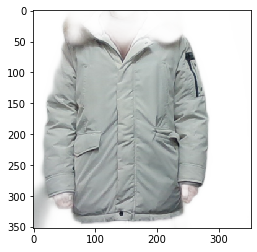

wow1 (352, 352, 3)
wow2 (1, 352, 352, 3)
(1, 352, 352, 3)


In [226]:
test3_1 = get_test_image2(os.path.join(test_dir, 'out3_1.png'))
test3_2 = get_test_image2(os.path.join(test_dir, 'out3_2.png'))
test3_3 = get_test_image2(os.path.join(test_dir, 'out3_3.png'))
test3_4 = get_test_image2(os.path.join(test_dir, 'out3_4.png'))

In [228]:
get_prediction(test3_1)
get_prediction(test3_2)
get_prediction(test3_3)
get_prediction(test3_4)

[[-4.494238   -3.2244554   0.42030293 -0.9777523   7.488225   -0.54925925
   0.21794242 -2.6514184   0.8354302  -3.8750615  -6.284844  ]]
4
[[ 0.1378937   0.8737683  -4.7290993   0.45497423 -4.012016   -0.8947231
  -0.31196243 -0.9585382   0.95883995 -1.334357   -1.1967577 ]]
8
[[-3.4491422  7.668179  -2.555054  -4.5023665 -2.1839416  2.487492
  -1.9988406  2.157224  -2.3643572 -4.887545  -2.473301 ]]
1
[[-2.6675649   0.7200479  -3.7827792  -1.6206337  -1.4190878   5.6455407
  -1.7359531  -2.527296   -0.85306424 -2.9697585  -1.6487942 ]]
5


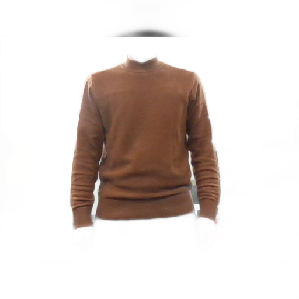

뭐야0 (299, 299, 3)
wow1 (299, 299, 3)
wow2 (1, 299, 299, 3)
(1, 299, 299, 3)


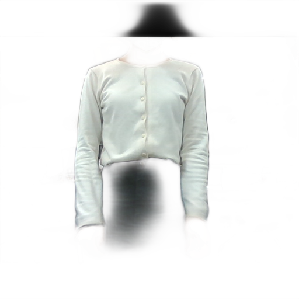

뭐야0 (299, 299, 3)
wow1 (299, 299, 3)
wow2 (1, 299, 299, 3)
(1, 299, 299, 3)


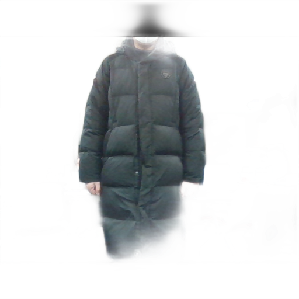

뭐야0 (299, 299, 3)
wow1 (299, 299, 3)
wow2 (1, 299, 299, 3)
(1, 299, 299, 3)


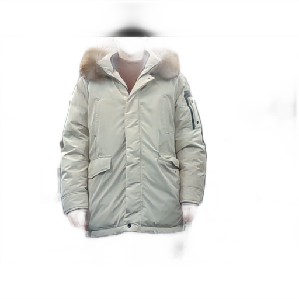

뭐야0 (299, 299, 3)
wow1 (299, 299, 3)
wow2 (1, 299, 299, 3)
(1, 299, 299, 3)


In [199]:
test2_1 = get_test_image2(os.path.join(test_dir, 'out2_1.png'))
test2_2 = get_test_image2(os.path.join(test_dir, 'out2_2.png'))
test2_3 = get_test_image2(os.path.join(test_dir, 'out2_3.png'))
test2_4 = get_test_image2(os.path.join(test_dir, 'out2_4.png'))

In [200]:
get_prediction(test2_1)
get_prediction(test2_2)
get_prediction(test2_2)
get_prediction(test2_4)

[[-2.8730505  -0.44843557  1.6336029  -4.1796684   2.6502502  -0.3258476
   0.13845192 -0.13611552  0.156076   -0.78177524 -3.5602036 ]]
4
[[-0.7274873   2.112918   -1.3127394   1.5286611  -1.0295056   0.29659685
  -3.237478   -0.4494767   0.32089186 -2.72721    -2.8970158 ]]
1
[[-0.7274873   2.112918   -1.3127394   1.5286611  -1.0295056   0.29659685
  -3.237478   -0.4494767   0.32089186 -2.72721    -2.8970158 ]]
1
[[-2.4681368  1.1572334 -2.769266  -4.7433324 -1.4966234  5.0702176
   6.37153   -4.2580123 -3.0717394 -2.1031218 -4.545832 ]]
6


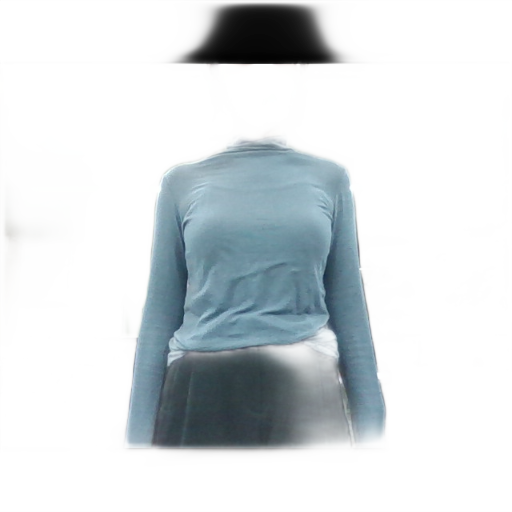

뭐야0 (512, 512, 3)


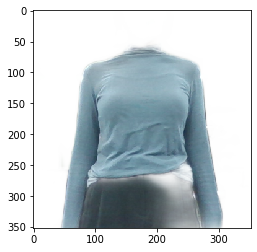

wow1 (352, 352, 3)
wow2 (1, 352, 352, 3)
(1, 352, 352, 3)


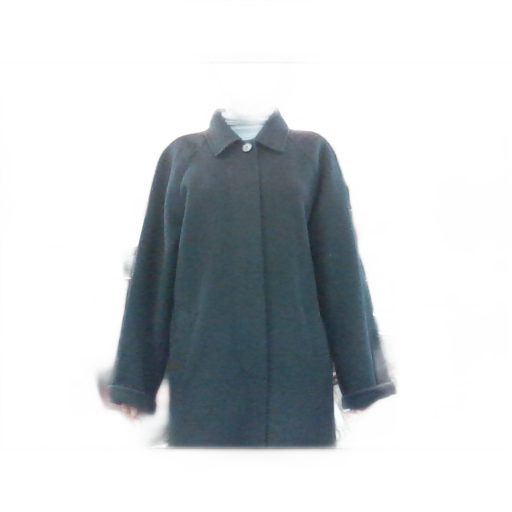

뭐야0 (512, 512, 3)


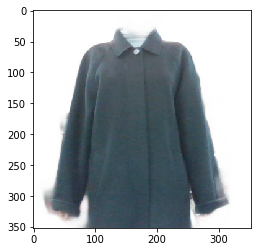

wow1 (352, 352, 3)
wow2 (1, 352, 352, 3)
(1, 352, 352, 3)


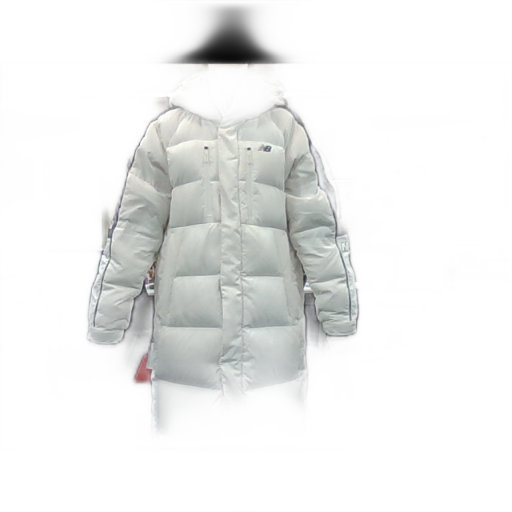

뭐야0 (512, 512, 3)


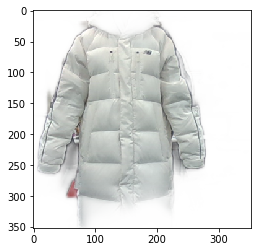

wow1 (352, 352, 3)
wow2 (1, 352, 352, 3)
(1, 352, 352, 3)


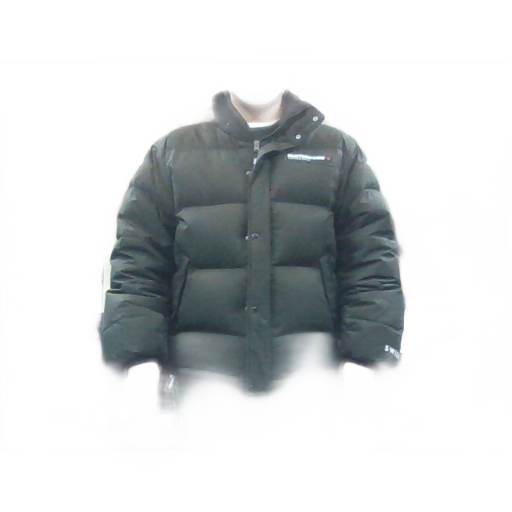

뭐야0 (512, 512, 3)


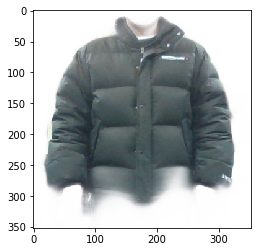

wow1 (352, 352, 3)
wow2 (1, 352, 352, 3)
(1, 352, 352, 3)


In [229]:
test4_1 = get_test_image2(os.path.join(test_dir, 'out4_1.png'))
test4_2 = get_test_image2(os.path.join(test_dir, 'out4_2.png'))
test4_3 = get_test_image2(os.path.join(test_dir, 'out4_3.png'))
test4_4 = get_test_image2(os.path.join(test_dir, 'out4_4.png'))

In [230]:
get_prediction(test4_1)
get_prediction(test4_2)
get_prediction(test4_2)
get_prediction(test4_4)

[[-1.8562198  -2.2028246  -0.16073593  0.5907234   3.3390467  -0.07132409
   0.53365415 -3.1921911  -0.1508249  -1.9891276  -3.5392013 ]]
4
[[-1.5720465  -0.29457074 -1.6218724  -0.6696582   1.2850267   0.2450713
   5.2848816  -3.5260262  -2.790404   -3.142556   -4.831258  ]]
6
[[-1.5720465  -0.29457074 -1.6218724  -0.6696582   1.2850267   0.2450713
   5.2848816  -3.5260262  -2.790404   -3.142556   -4.831258  ]]
6
[[-1.0786457  5.523591  -4.492042  -0.6991582 -2.0842881  4.0517836
  -4.3298664 -2.0225146 -0.7532798 -4.0428    -2.2821388]]
1


In [ ]:
test_path = ""
def test():
